In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'


In [2]:
# Load train, test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
display(train.head(3))
display(test.head(3))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

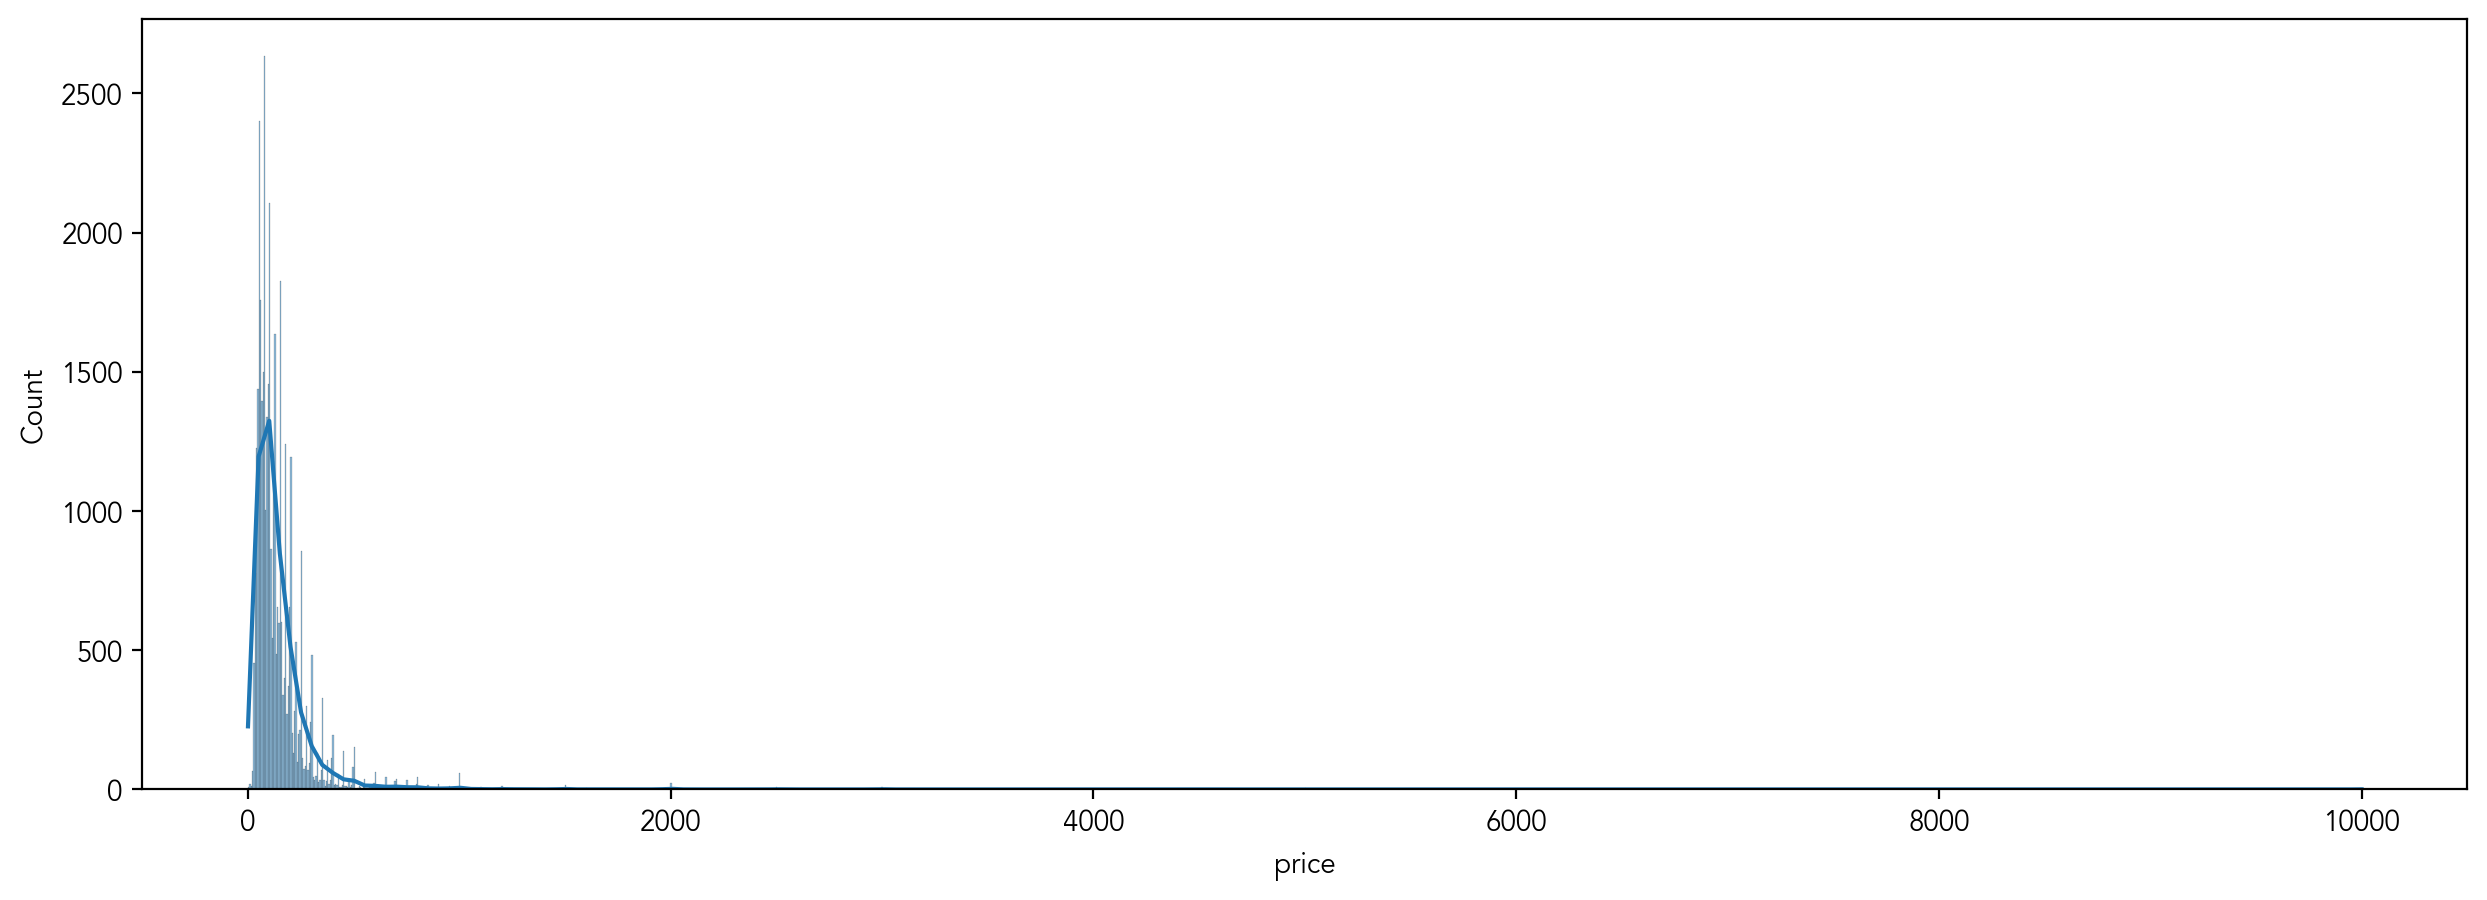

In [8]:
fig = plt.figure(figsize = (15, 5))
sns.histplot(data = train, x = 'price', kde = True)

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39116.0,1.898464e+07,1.099302e+07,2539.00000,9.412608e+06,1.963650e+07,2.913445e+07,3.648561e+07
host_id,39116.0,6.774143e+07,7.881383e+07,2438.00000,7.834978e+06,3.070949e+07,1.074344e+08,2.743213e+08
latitude,39116.0,4.072885e+01,5.449853e-02,40.49979,4.069004e+01,4.072300e+01,4.076294e+01,4.091234e+01
longitude,39116.0,-7.395213e+01,4.635398e-02,-74.24442,-7.398319e+01,-7.395574e+01,-7.393634e+01,-7.371299e+01
price,39116.0,1.527512e+02,2.417525e+02,0.00000,6.900000e+01,1.050000e+02,1.750000e+02,1.000000e+04
minimum_nights,39116.0,6.990720e+00,2.031032e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,39116.0,2.327286e+01,4.458917e+01,0.00000,1.000000e+00,5.000000e+00,2.300000e+01,6.290000e+02
reviews_per_month,31122.0,1.372444e+00,1.683963e+00,0.01000,1.900000e-01,7.100000e-01,2.010000e+00,5.850000e+01
calculated_host_listings_count,39116.0,7.090756e+00,3.266114e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,39116.0,1.129808e+02,1.316743e+02,0.00000,0.000000e+00,4.500000e+01,2.280000e+02,3.650000e+02


In [10]:
# Drop missing data in 'last_review'
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [11]:
display(train.head(3))
display(test.head(3))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,0.20,1,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,0.65,4,365


In [12]:
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [13]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [14]:
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [15]:
test.isnull().sum()

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
target = train['price']
train = train.drop('price', axis=1)

In [17]:
target.describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,28,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,35425034,Stylish studio by Fulton station,107724585,Jessie,Manhattan,Financial District,40.71035,-74.00734,Entire home/apt,30,0,0.00,2,346
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Shared Stay-JFK The Hugh Suite,Queens,Springfield Gardens,40.66102,-73.77035,Private room,1,57,7.28,3,342
39113,13261616,"Sunny, Accessible, UES Apt - Summer in the City",24693048,Tola,Manhattan,Upper East Side,40.77693,-73.94524,Entire home/apt,7,0,0.00,1,0
39114,531258,1 BR Village - 30 day+ stay,2609535,Alexandra,Manhattan,Greenwich Village,40.73110,-73.99913,Entire home/apt,30,19,0.23,1,259


In [19]:
train['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        17331
Brooklyn         16081
Queens            4530
Bronx              884
Staten Island      290
Name: count, dtype: int64

In [20]:
train['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3099
Bedford-Stuyvesant    2953
Harlem                2114
Bushwick              1981
Hell's Kitchen        1557
                      ... 
Silver Lake              1
Richmondtown             1
Willowbrook              1
New Dorp                 1
Fort Wadsworth           1
Name: count, Length: 221, dtype: int64

In [21]:
train['room_type'].value_counts()

room_type
Entire home/apt    20299
Private room       17876
Shared room          941
Name: count, dtype: int64

In [22]:
# Perform one-hot encoding on the specified features
train_encoded = pd.get_dummies(train, columns=['neighbourhood_group', 'room_type'])
test_encoded = pd.get_dummies(test, columns=['neighbourhood_group', 'room_type'])

# Align the train and test data to ensure they have the same columns
train, test = train_encoded.align(test_encoded, join='left', axis=1)

# Fill any new NaN values with 0
train = train.fillna(0)
test = test.fillna(0)

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder to the 'neighbourhood' column in the training data
encoder.fit(train['neighbourhood'])

# Transform the 'neighbourhood' column in the training and test data
train['neighbourhood'] = encoder.transform(train['neighbourhood'])
test['neighbourhood'] = encoder.transform(test['neighbourhood'])

In [24]:
train.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,94,40.80167,-73.95781,3,3,0.09,2,0,False,False,True,False,False,False,True,False
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,95,40.76037,-73.99016,2,64,1.68,2,262,False,False,True,False,False,True,False,False
2,26871281,West Village Apartment,440022,Petter,209,40.73001,-74.00562,60,1,0.20,1,0,False,False,True,False,False,True,False,False
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,13,40.69128,-73.93653,4,239,2.89,2,1,False,True,False,False,False,True,False,False
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,13,40.68899,-73.95555,28,0,0.00,1,0,False,True,False,False,False,False,True,False


In [25]:
target.head()

0     70
1    240
2    150
3     85
4     44
Name: price, dtype: int64

In [26]:
train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [27]:
cols = [
    'neighbourhood',
    'latitude',
    'longitude',
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'availability_365',
    'neighbourhood_group_Bronx', 
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_Manhattan', 
    'neighbourhood_group_Queens',
    'neighbourhood_group_Staten Island', 
    'room_type_Entire home/apt',
    'room_type_Private room', 
    'room_type_Shared room'
    ]

train = train[cols]
test = test[cols]

In [28]:
train

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,94,40.80167,-73.95781,3,3,0.09,2,0,False,False,True,False,False,False,True,False
1,95,40.76037,-73.99016,2,64,1.68,2,262,False,False,True,False,False,True,False,False
2,209,40.73001,-74.00562,60,1,0.20,1,0,False,False,True,False,False,True,False,False
3,13,40.69128,-73.93653,4,239,2.89,2,1,False,True,False,False,False,True,False,False
4,13,40.68899,-73.95555,28,0,0.00,1,0,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,73,40.71035,-74.00734,30,0,0.00,2,346,False,False,True,False,False,True,False,False
39112,183,40.66102,-73.77035,1,57,7.28,3,342,False,False,False,True,False,False,True,False
39113,201,40.77693,-73.94524,7,0,0.00,1,0,False,False,True,False,False,True,False,False
39114,92,40.73110,-73.99913,30,19,0.23,1,259,False,False,True,False,False,True,False,False


In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
neighbourhood,39116.0,106.870513,68.593641,0.00000,51.000000,94.00000,178.000000,220.00000
latitude,39116.0,40.728848,0.054499,40.49979,40.690038,40.72300,40.762943,40.91234
longitude,39116.0,-73.952125,0.046354,-74.24442,-73.983190,-73.95574,-73.936338,-73.71299
minimum_nights,39116.0,6.990720,20.310323,1.00000,1.000000,2.00000,5.000000,1250.00000
number_of_reviews,39116.0,23.272855,44.589170,0.00000,1.000000,5.00000,23.000000,629.00000
reviews_per_month,39116.0,1.091963,1.600772,0.00000,0.040000,0.37000,1.590000,58.50000
calculated_host_listings_count,39116.0,7.090756,32.661136,1.00000,1.000000,1.00000,2.000000,327.00000
availability_365,39116.0,112.980826,131.674306,0.00000,0.000000,45.00000,228.000000,365.00000


In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# List of columns to scale
cols_to_scale = ['latitude','longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Fit the scaler to the columns in the training data and transform them
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])

# Transform the same columns in the test data using the same scaler
test[cols_to_scale] = scaler.transform(test[cols_to_scale])

In [31]:
train

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,94,1.336232,-0.122644,-0.196490,-0.454665,-0.625932,-0.155868,-0.858043,False,False,True,False,False,False,True,False
1,95,0.578404,-0.820543,-0.245726,0.913398,0.367351,-0.155868,1.131740,False,False,True,False,False,True,False,False
2,209,0.021318,-1.154068,2.610001,-0.499519,-0.557215,-0.186486,-0.858043,False,False,True,False,False,True,False,False
3,13,-0.689353,0.336438,-0.147253,4.838168,1.123245,-0.155868,-0.850449,False,True,False,False,False,True,False,False
4,13,-0.731373,-0.073888,1.034427,-0.521946,-0.682156,-0.186486,-0.858043,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,73,-0.339431,-1.191174,1.132900,-0.521946,-0.682156,-0.155868,1.769686,False,False,True,False,False,True,False,False
39112,183,-1.244604,3.921505,-0.294963,0.756407,3.865707,-0.125250,1.739307,False,False,False,True,False,False,True,False
39113,201,0.882269,0.148534,0.000457,-0.521946,-0.682156,-0.186486,-0.858043,False,False,True,False,False,True,False,False
39114,92,0.041318,-1.014057,1.132900,-0.095828,-0.538474,-0.186486,1.108956,False,False,True,False,False,True,False,False


In [32]:
test

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,214,-0.353376,0.120920,-0.196490,-0.477092,-0.488497,-0.186486,-0.858043,False,True,False,False,False,False,True,False
1,202,1.189621,-0.274952,-0.196490,3.043988,0.623480,-0.186486,0.995037,False,False,True,False,False,True,False,False
2,41,-0.763851,-0.232237,-0.294963,0.689126,-0.276097,-0.094632,1.913983,False,True,False,False,False,True,False,False
3,41,-0.738713,-0.177440,-0.196490,-0.477092,-0.600944,-0.186486,-0.858043,False,True,False,False,False,True,False,False
4,94,1.410731,0.047139,-0.294963,3.066415,2.010329,-0.125250,1.010227,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,91,-0.086577,0.026428,-0.245726,-0.207965,-0.244862,-0.186486,-0.151746,False,True,False,False,False,True,False,False
9775,28,-0.630818,0.830253,-0.245726,-0.409810,1.922870,-0.155868,1.427929,False,True,False,False,False,False,True,False
9776,29,-0.696326,4.750355,-0.294963,0.240580,6.320803,-0.186486,-0.394773,False,False,False,True,False,False,True,False
9777,94,1.699366,0.132569,-0.294963,-0.521946,-0.682156,-0.186486,-0.858043,False,False,True,False,False,False,True,False


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.3, random_state=2024)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((27381, 16), (11735, 16), (27381,), (11735,))

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

56924.45373662814

In [35]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_val)
mean_squared_error(y_val, pred_rf)


55654.05747428207

In [36]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train) 
pred_xgb = model_xgb.predict(X_val) 
mean_squared_error(y_val, pred_xgb) 

56454.790627556045

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


params={'learning_rate':[0.07, 0.05, 0.03], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200, 300],
        'subsample':[0.9, 0.8, 0.7, 0.6]
        }


xgb = XGBRegressor()
grid = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.6}

In [38]:
xgb = XGBRegressor(
    learning_rate=0.03, 
    max_depth=7, 
    n_estimators=100, 
    subsample=0.6)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
print(mean_squared_error(y_val, pred))

54211.92800758739


In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_val)
print('mean_squared_error:', mean_squared_error(y_val, pred_lr))
print('mean_absolute_error:', mean_absolute_error(y_val, pred_lr))
print('r2_score:', r2_score(y_val, pred_lr))

In [ ]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_val)
print('mean_squared_error:', mean_squared_error(y_val, pred_ridge))
print('mean_absolute_error:', mean_absolute_error(y_val, pred_ridge))
print('r2_score:', r2_score(y_val, pred_ridge))

In [ ]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test, pred_lasso))
print('mean_absolute_error:', mean_absolute_error(y_test, pred_lasso))
print('r2_score:', r2_score(y_test, pred_lasso))

In [ ]:
model_en = ElasticNet()
model_en.fit(X_train, y_train)
pred_en = model_en.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test, pred_en))
print('mean_absolute_error:', mean_absolute_error(y_test, pred_en))
print('r2_score:', r2_score(y_test, pred_en))